In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('/content/heart (1).csv')
df.head()



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

df.shape

df.isnull().sum()

df.duplicated().sum()

df.describe()

df.nunique

df['Age'].unique()

df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,0
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


In [ ]:
print(df.shape)  # This will show you how many features were used


(918, 12)


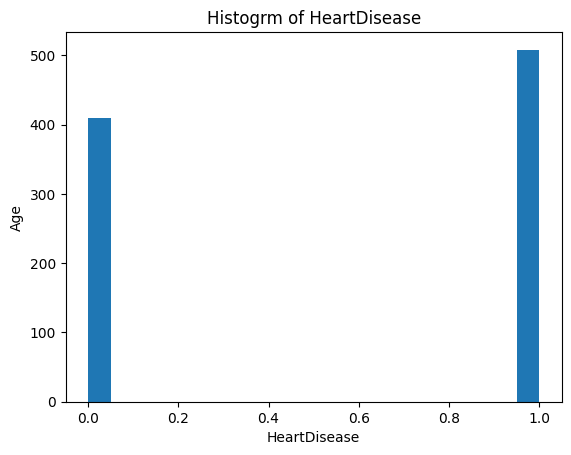

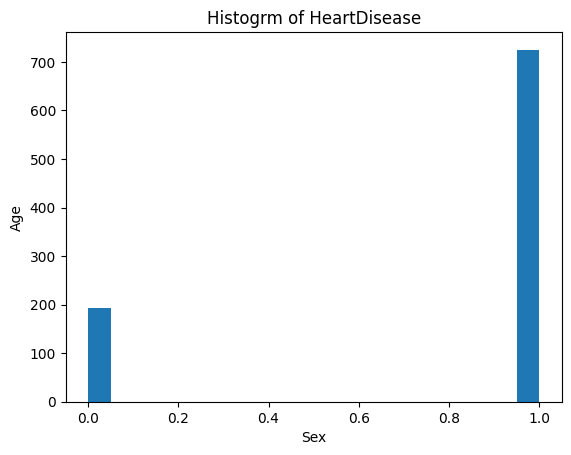

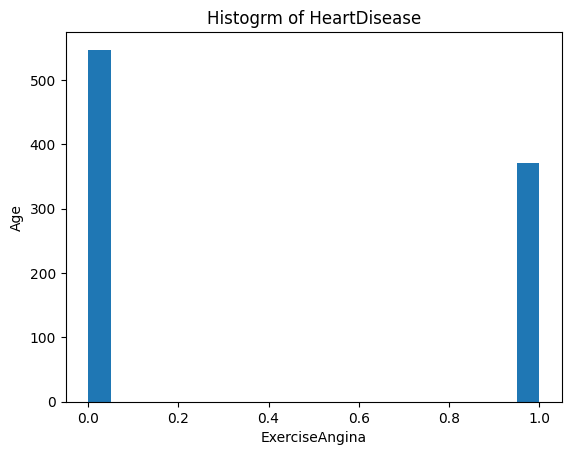

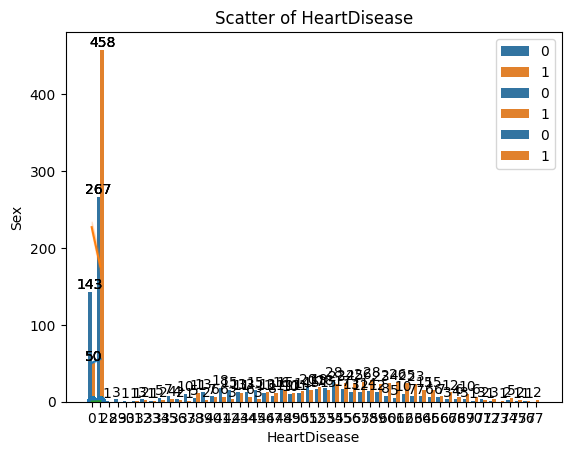

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])
df.head()

x=df['HeartDisease']
plt.hist(x,bins=20)
plt.xlabel('HeartDisease')
plt.ylabel('Age')
plt.title('Histogrm of HeartDisease')
plt.show()

x=df['Sex']
plt.hist(x,bins=20)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Histogrm of HeartDisease')
plt.show()

x=df['ExerciseAngina']
plt.hist(x,bins=20)
plt.xlabel('ExerciseAngina')
plt.ylabel('Age')
plt.title('Histogrm of HeartDisease')
plt.show()

sns.countplot(x='Sex',data=df,hue='HeartDisease')

ax =sns.countplot(x='Sex',data=df,hue='HeartDisease')
for bars in ax.containers:
    ax.bar_label(bars)

df['Sex'].value_counts()

ax =sns.countplot(x='Age',data=df,hue='HeartDisease')
for bars in ax.containers:
    ax.bar_label(bars)

sns.lineplot(x = 'HeartDisease', y = 'Age', data = df)

sns.lineplot(x = 'HeartDisease', y = 'Cholesterol', data = df)

sns.lineplot(x = 'HeartDisease', y = 'ExerciseAngina', data = df)

x=df['HeartDisease']
y=df['Sex']
plt.scatter(x,y)
plt.xlabel('HeartDisease')
plt.ylabel('Sex')
plt.title('Scatter of HeartDisease')
plt.show()

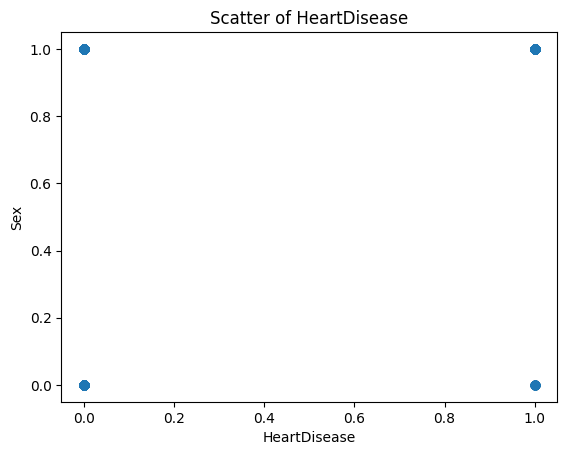

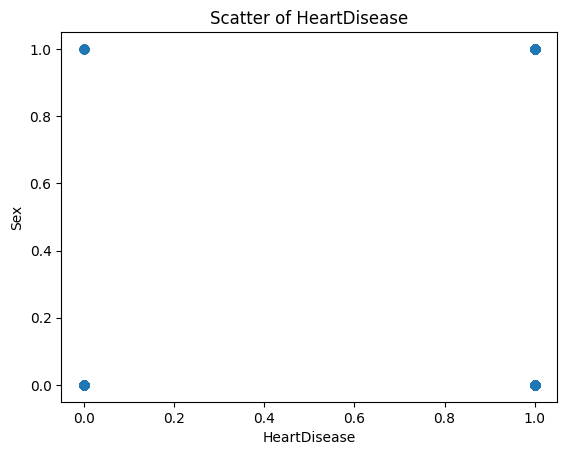

Best Hyperparameters {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 300}


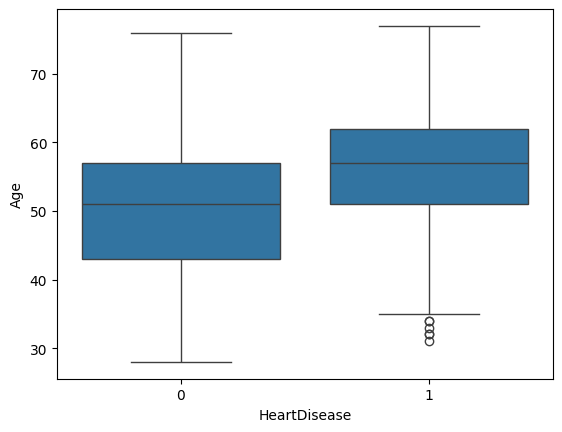

In [ ]:
x=df['HeartDisease']
y=df['Sex']
plt.scatter(x,y)
plt.xlabel('HeartDisease')
plt.ylabel('Sex')
plt.title('Scatter of HeartDisease')
plt.show()

x=df['Sex']
y=df['ExerciseAngina']
plt.scatter(x,y)
plt.xlabel('HeartDisease')
plt.ylabel('Sex')
plt.title('Scatter of HeartDisease')
plt.show()

sns.boxplot(x = 'HeartDisease', y = 'Age', data = df)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# Importing Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])
df.head()

df.head(12)

X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

# Splitting The Dataset for Training Models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('model', RandomForestClassifier(random_state=42))
])

hyperperameters = {
    'model__n_estimators': [100,200,300],
    'model__max_depth': [None,5,10],
    'model__min_samples_split': [2,5,10]
}

grid_search = GridSearchCV(pipeline,hyperperameters,cv=5)
grid_search.fit(X_train,y_train)

best_model=grid_search.best_estimator_

y_pred=best_model.predict(X_test)
y_pred

accuracy=accuracy_score(y_test,y_pred)
accuracy

print('Best Hyperparameters',grid_search.best_params_)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC(),
    "Naive Bayes": GaussianNB()

}

# Function to train, evaluate, and print stats for each model
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        print(f"{name} Accuracy: {accuracy:.4f}")
        print(f"{name} Classification Report:\n{report}")
        print(f"{name} Confusion Matrix:\n{conf_matrix}")
        print("-" * 50)

        results[name] = accuracy

    # Finding the best model based on accuracy
    best_model_name = max(results, key=results.get)
    best_model_accuracy = results[best_model_name]
    print(f"Best Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")

In [ ]:
# Correct the column names in the sample_data dictionary
sample_data = {
    'Age': [37],
    'Sex': [1],
    'ChestPainType': [1],
    'RestingBP': [130],
    'Cholesterol': [283],  # Corrected spelling
    'FastingBS': [0],      # Corrected spelling
    'RestingECG': [2],
    'MaxHR': [98],
    'ExerciseAngina': [0],
    'Oldpeak': [0.0],
    'ST_Slope':[2]
}

# Convert sample data to DataFrame
df_sample = pd.DataFrame(sample_data)

# Assign the best model from GridSearchCV to rf
rf = best_model

# Predict using the loaded Random Forest model
predictions = rf.predict(df_sample)
pred_proba = rf.predict_proba(df_sample)

# Extract probabilities for the class
prob_disease = pred_proba[0][1] * 100

# Print the result
print(f"Prediction: {'Heart Disease' if predictions[0] == 1 else 'No Heart Disease'}")
print(f"Prediction Probability: {pred_proba[0]}")
print(f"Probability of Having Disease: {prob_disease:.2f}%")

# Repeat the correction for all subsequent sample_data dictionaries
sample_data = {
    'Age': [23],
    'Sex': [1],
    'ChestPainType': [1],
    'RestingBP': [130],
    'Cholesterol': [145], # Corrected spelling
    'FastingBS': [2],      # Corrected spelling
    'RestingECG': [98],
    'MaxHR': [0],
    'ExerciseAngina': [0.0],
    'Oldpeak': [2],
    'ST_Slope':[2]
}

# Convert sample data to DataFrame
df_sample = pd.DataFrame(sample_data)

# Predict using the loaded Random Forest model
predictions = rf.predict(df_sample)
pred_proba = rf.predict_proba(df_sample)

# Extract probabilities for the class
prob_disease = pred_proba[0][1] * 100

# Print the result
print(f"Prediction: {'Heart Disease' if predictions[0] == 1 else 'No Heart Disease'}")
print(f"Prediction Probability: {pred_proba[0]}")
print(f"Probability of Having Disease: {prob_disease:.2f}%")


sample_data = {
    'Age': [49],
    'Sex': [0],
    'ChestPainType': [1], # Assuming ChestPainType should be 1 based on previous encodings
    'RestingBP': [160],
    'Cholesterol': [180], # Corrected spelling
    'FastingBS': [0],      # Corrected spelling
    'RestingECG': [1],
    'MaxHR': [156],
    'ExerciseAngina': [0],
    'Oldpeak': [1.0],
    'ST_Slope':[1]
}

# Convert sample data to DataFrame
df_sample = pd.DataFrame(sample_data)

# Predict using the loaded Random Forest model
predictions = rf.predict(df_sample)
pred_proba = rf.predict_proba(df_sample)

# Extract probabilities for the class
prob_disease = pred_proba[0][1] * 100

# Print the result
print(f"Prediction: {'Heart Disease' if predictions[0] == 1 else 'No Heart Disease'}")
print(f"Prediction Probability: {pred_proba[0]}")
print(f"Probability of Having Disease: {prob_disease:.2f}%")


sample_data = {
    'Age': [37],
    'Sex': [1],
    'ChestPainType': [1],
    'RestingBP': [130],
    'Cholesterol': [283], # Corrected spelling
    'FastingBS': [0],      # Corrected spelling
    'RestingECG': [2],
    'MaxHR': [98],
    'ExerciseAngina': [0],
    'Oldpeak': [0.0],
    'ST_Slope':[1]
}

# Convert sample data to DataFrame
df_sample = pd.DataFrame(sample_data)

# Predict using the loaded Random Forest model
predictions = rf.predict(df_sample)
pred_proba = rf.predict_proba(df_sample)

# Extract probabilities for the class
prob_disease = pred_proba[0][1] * 100

# Print the result
print(f"Prediction: {'Heart Disease' if predictions[0] == 1 else 'No Heart Disease'}")
print(f"Prediction Probability: {pred_proba[0]}")
print(f"Probability of Having Disease: {prob_disease:.2f}%")


sample_data = {
    'Age': [48],
    'Sex': [0],
    'ChestPainType': [1],
    'RestingBP': [120],
    'Cholesterol': [284], # Corrected spelling
    'FastingBS': [0],      # Corrected spelling
    'RestingECG': [1],
    'MaxHR': [120],
    'ExerciseAngina': [0],
    'Oldpeak': [0.0],
    'ST_Slope':[1]
}

# Convert sample data to DataFrame
df_sample = pd.DataFrame(sample_data)

# Predict using the loaded Random Forest model
predictions = rf.predict(df_sample)
pred_proba = rf.predict_proba(df_sample)

# Extract probabilities for the class
prob_disease = pred_proba[0][1] * 100

# Print the result
print(f"Prediction: {'Heart Disease' if predictions[0] == 1 else 'No Heart Disease'}")
print(f"Prediction Probability: {pred_proba[0]}")
print(f"Probability of Having Disease: {prob_disease:.2f}%")


sample_data = {
    'Age': [37],
    'Sex': [1],
    'ChestPainType': [1],
    'RestingBP': [130],
    'Cholesterol': [283], # Corrected spelling
    'FastingBS': [0],      # Corrected spelling
    'RestingECG': [2],
    'MaxHR': [98],
    'ExerciseAngina': [0],
    'Oldpeak': [0.0],
    'ST_Slope':[1]
}

# Convert sample data to DataFrame
df_sample = pd.DataFrame(sample_data)

# Predict using the loaded Random Forest model
predictions = rf.predict(df_sample)
pred_proba = rf.predict_proba(df_sample)

# Extract probabilities for the class
prob_disease = pred_proba[0][1] * 100

# Print the result
print(f"Prediction: {'Heart Disease' if predictions[0] == 1 else 'No Heart Disease'}")
print(f"Prediction Probability: {pred_proba[0]}")
print(f"Probability of Having Disease: {prob_disease:.2f}%")


sample_data = {
    'Age': [37],
    'Sex': [0],
    'ChestPainType': [1],
    'RestingBP': [130],
    'Cholesterol': [283], # Corrected spelling
    'FastingBS': [0],      # Corrected spelling
    'RestingECG': [2],
    'MaxHR': [98],
    'ExerciseAngina': [0],
    'Oldpeak': [0.0],
    'ST_Slope':[2]
}

# Convert sample data to DataFrame
df_sample = pd.DataFrame(sample_data)

# Predict using the loaded Random Forest model
predictions = rf.predict(df_sample)
pred_proba = rf.predict_proba(df_sample)

# Extract probabilities for the class
prob_disease = pred_proba[0][1] * 100

# Print the result
print(f"Prediction: {'Heart Disease' if predictions[0] == 1 else 'No Heart Disease'}")
print(f"Prediction Probability: {pred_proba[0]}")
print(f"Probability of Having Disease: {prob_disease:.2f}%")


sample_data = {
    'Age': [45],
    'Sex': [0],
    'ChestPainType': [1],
    'RestingBP': [130],
    'Cholesterol': [283], # Corrected spelling
    'FastingBS': [0],      # Corrected spelling
    'RestingECG': [2],
    'MaxHR': [98],
    'ExerciseAngina': [0],
    'Oldpeak': [0.0],
    'ST_Slope':[1]
}

# Convert sample data to DataFrame
df_sample = pd.DataFrame(sample_data)

# Predict using the loaded Random Forest model
predictions = rf.predict(df_sample)
pred_proba = rf.predict_proba(df_sample)

# Extract probabilities for the class
prob_disease = pred_proba[0][1] * 100

# Print the result
print(f"Prediction: {'Heart Disease' if predictions[0] == 1 else 'No Heart Disease'}")
print(f"Prediction Probability: {pred_proba[0]}")
print(f"Probability of Having Disease: {prob_disease:.2f}%")


sample_data = {
    'Age': [47],
    'Sex': [0],
    'ChestPainType': [5], # Assuming ChestPainType should be 5 based on previous encodings
    'RestingBP': [130],
    'Cholesterol': [283], # Corrected spelling
    'FastingBS': [0],      # Corrected spelling
    'RestingECG': [2],
    'MaxHR': [123],
    'ExerciseAngina': [0],
    'Oldpeak': [0.0],
    'ST_Slope':[2]
}

# Convert sample data to DataFrame
df_sample = pd.DataFrame(sample_data)

# Predict using the loaded Random Forest model
predictions = rf.predict(df_sample)
pred_proba = rf.predict_proba(df_sample)

# Extract probabilities for the class
prob_disease = pred_proba[0][1] * 100

# Print the result
print(f"Prediction: {'Heart Disease' if predictions[0] == 1 else 'No Heart Disease'}")
print(f"Prediction Probability: {pred_proba[0]}")
print(f"Probability of Having Disease: {prob_disease:.2f}%")

Prediction: No Heart Disease
Prediction Probability: [0.98666667 0.01333333]
Probability of Having Disease: 1.33%
Prediction: No Heart Disease
Prediction Probability: [0.82 0.18]
Probability of Having Disease: 18.00%
Prediction: Heart Disease
Prediction Probability: [0.47 0.53]
Probability of Having Disease: 53.00%
Prediction: No Heart Disease
Prediction Probability: [0.50333333 0.49666667]
Probability of Having Disease: 49.67%
Prediction: No Heart Disease
Prediction Probability: [0.76 0.24]
Probability of Having Disease: 24.00%
Prediction: No Heart Disease
Prediction Probability: [0.50333333 0.49666667]
Probability of Having Disease: 49.67%
Prediction: No Heart Disease
Prediction Probability: [0.99333333 0.00666667]
Probability of Having Disease: 0.67%
Prediction: No Heart Disease
Prediction Probability: [0.79 0.21]
Probability of Having Disease: 21.00%
Prediction: No Heart Disease
Prediction Probability: [0.95333333 0.04666667]
Probability of Having Disease: 4.67%


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Since data is already numeric, we only impute and train
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('model', RandomForestClassifier(random_state=42))
])

hyperparameters = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Best Hyperparameters:", grid_search.best_params_)


Accuracy: 0.8858695652173914
Best Hyperparameters: {'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 200}


In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables
cholesterol = ctrl.Antecedent(np.arange(100, 351, 1), 'cholesterol')
blood_pressure = ctrl.Antecedent(np.arange(80, 201, 1), 'blood_pressure')
bilirubin = ctrl.Antecedent(np.arange(0.1, 5.1, 0.1), 'bilirubin')
albumin = ctrl.Antecedent(np.arange(2.0, 6.1, 0.1), 'albumin')

survival = ctrl.Consequent(np.arange(0, 101, 1), 'survival')

# Membership functions
cholesterol['low'] = fuzz.trimf(cholesterol.universe, [100, 100, 200])
cholesterol['medium'] = fuzz.trimf(cholesterol.universe, [150, 225, 300])
cholesterol['high'] = fuzz.trimf(cholesterol.universe, [250, 350, 350])

blood_pressure['low'] = fuzz.trimf(blood_pressure.universe, [80, 80, 120])
blood_pressure['normal'] = fuzz.trimf(blood_pressure.universe, [100, 130, 160])
blood_pressure['high'] = fuzz.trimf(blood_pressure.universe, [140, 200, 200])

bilirubin['low'] = fuzz.trimf(bilirubin.universe, [0.1, 0.1, 1.0])
bilirubin['medium'] = fuzz.trimf(bilirubin.universe, [0.5, 2.0, 3.5])
bilirubin['high'] = fuzz.trimf(bilirubin.universe, [2.5, 5.0, 5.0])

albumin['low'] = fuzz.trimf(albumin.universe, [2.0, 2.0, 3.5])
albumin['normal'] = fuzz.trimf(albumin.universe, [3.0, 4.0, 5.0])
albumin['high'] = fuzz.trimf(albumin.universe, [4.5, 6.0, 6.0])

survival['not_survive'] = fuzz.trimf(survival.universe, [0, 0, 50])
survival['survive'] = fuzz.trimf(survival.universe, [50, 100, 100])

# Define fuzzy rules
rules = [
    ctrl.Rule(cholesterol['high'] & blood_pressure['high'] & bilirubin['high'] & albumin['low'], survival['not_survive']),
    ctrl.Rule(cholesterol['low'] & blood_pressure['normal'] & bilirubin['low'] & albumin['high'], survival['survive']),
    ctrl.Rule(cholesterol['medium'] & blood_pressure['normal'] & bilirubin['medium'] & albumin['normal'], survival['survive']),
    ctrl.Rule(cholesterol['high'] | blood_pressure['high'] | bilirubin['high'], survival['not_survive']),
    ctrl.Rule(albumin['high'], survival['survive']),
]

# Control system
survival_ctrl = ctrl.ControlSystem(rules)
survival_sim = ctrl.ControlSystemSimulation(survival_ctrl)

# Example input
survival_sim.input['cholesterol'] = 180
survival_sim.input['blood_pressure'] = 130
survival_sim.input['bilirubin'] = 1.2
survival_sim.input['albumin'] = 4.2

# Compute
survival_sim.compute()

print(f"Survival Chance: {survival_sim.output['survival']:.2f}%")

Survival Chance: 79.58%


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables
StressLevel = ctrl.Antecedent(np.arange(0, 11, 1), 'StressLevel')
BloodSugar = ctrl.Antecedent(np.arange(50, 251, 1), 'BloodSugar')
AlcoholConsumption = ctrl.Antecedent(np.arange(0, 41,1), 'AlcoholConsumption')
BMI = ctrl.Antecedent(np.arange(10, 51,1), 'BMI')

survival = ctrl.Consequent(np.arange(0, 101, 1), 'survival')

# Membership functions
StressLevel['low'] = fuzz.trimf(StressLevel.universe, [0, 0, 4])
StressLevel['medium'] = fuzz.trimf(StressLevel.universe, [2, 5, 8])
StressLevel['high'] = fuzz.trimf(StressLevel.universe, [6, 10, 10])

BloodSugar['low'] = fuzz.trimf(BloodSugar.universe, [50, 50, 90])
BloodSugar['medium'] = fuzz.trimf(BloodSugar.universe, [80, 120, 160])
BloodSugar['high'] = fuzz.trimf(BloodSugar.universe, [140, 250, 250])

AlcoholConsumption['low'] = fuzz.trimf(AlcoholConsumption.universe, [0, 0, 10])
AlcoholConsumption['medium'] = fuzz.trimf(AlcoholConsumption.universe, [5, 20, 30])
AlcoholConsumption['high'] = fuzz.trimf(AlcoholConsumption.universe, [20, 40, 40])

BMI['low'] = fuzz.trimf(BMI.universe, [10, 10, 18.5])
BMI['medium'] = fuzz.trimf(BMI.universe, [18, 24, 29])
BMI['high'] = fuzz.trimf(BMI.universe, [27, 50, 50])

survival['not_survive'] = fuzz.trimf(survival.universe, [0, 0, 50])
survival['survive'] = fuzz.trimf(survival.universe, [50, 100, 100])

# Define fuzzy rules
rules = [
    ctrl.Rule(StressLevel['high'] & BloodSugar['high'] & AlcoholConsumption['high'] & BMI['low'], survival['not_survive']),
    ctrl.Rule(StressLevel['low'] & BloodSugar['medium'] & AlcoholConsumption['low'] & BMI['high'], survival['survive']),
    ctrl.Rule(StressLevel['medium'] & BloodSugar['low'] & AlcoholConsumption['medium'] & BMI['medium'], survival['survive']),
    ctrl.Rule(StressLevel['high'] | BloodSugar['high'] | AlcoholConsumption['high'], survival['not_survive']),
    ctrl.Rule(BMI['high'], survival['survive']),
]

# Control system
survival_ctrl = ctrl.ControlSystem(rules)
survival_sim = ctrl.ControlSystemSimulation(survival_ctrl)

# Example input
survival_sim.input['StressLevel'] = 3
survival_sim.input['BloodSugar'] = 100
survival_sim.input['AlcoholConsumption'] = 6
survival_sim.input['BMI'] = 30

# Compute
survival_sim.compute()

print(f"Survival Chance: {survival_sim.output['survival']:.2f}%")

Survival Chance: 76.59%


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables for health indicators
# Heart Rate: beats per minute (bpm)
HeartRate = ctrl.Antecedent(np.arange(40, 201, 1), 'HeartRate')
# Diabetes: a conceptual severity scale from 0 (no diabetes) to 10 (severe diabetes)
Diabetes = ctrl.Antecedent(np.arange(0, 11, 1), 'Diabetes')
# Physical Activity: a conceptual activity level scale from 0 (sedentary) to 10 (very active)
PhysicalActivity = ctrl.Antecedent(np.arange(0, 11, 1), 'PhysicalActivity')
# Hypertension: a conceptual severity scale from 0 (normal BP) to 10 (severe hypertension)
Hypertension = ctrl.Antecedent(np.arange(0, 11, 1), 'Hypertension')

# Consequent variable: Survival Chance (0-100%)
survival = ctrl.Consequent(np.arange(0, 101, 1), 'survival')

# --- Membership functions for Antecedent Variables ---

# Heart Rate Membership Functions
HeartRate['low'] = fuzz.trimf(HeartRate.universe, [40, 40, 60]) # e.g., for very fit individuals or certain conditions
HeartRate['normal'] = fuzz.trimf(HeartRate.universe, [50, 75, 100]) # Healthy resting heart rate range
HeartRate['high'] = fuzz.trimf(HeartRate.universe, [90, 200, 200]) # Elevated heart rate, potentially problematic

# Diabetes Membership Functions
Diabetes['no_diabetes'] = fuzz.trimf(Diabetes.universe, [0, 0, 3]) # No signs of diabetes
Diabetes['pre_diabetes'] = fuzz.trimf(Diabetes.universe, [2, 5, 8]) # Borderline or pre-diabetic conditions
Diabetes['diabetes'] = fuzz.trimf(Diabetes.universe, [7, 10, 10]) # Diagnosed diabetes

# Physical Activity Membership Functions
PhysicalActivity['sedentary'] = fuzz.trimf(PhysicalActivity.universe, [0, 0, 4]) # Low to no physical activity
PhysicalActivity['moderate'] = fuzz.trimf(PhysicalActivity.universe, [2, 5, 8]) # Regular moderate activity
PhysicalActivity['active'] = fuzz.trimf(PhysicalActivity.universe, [6, 10, 10]) # Highly active lifestyle

# Hypertension Membership Functions
Hypertension['normal'] = fuzz.trimf(Hypertension.universe, [0, 0, 3]) # Normal blood pressure
Hypertension['pre_hypertension'] = fuzz.trimf(Hypertension.universe, [2, 5, 8]) # Elevated blood pressure, pre-hypertensive
Hypertension['hypertension'] = fuzz.trimf(Hypertension.universe, [7, 10, 10]) # Diagnosed hypertension

# --- Membership functions for Consequent Variable ---
survival['not_survive'] = fuzz.trimf(survival.universe, [0, 0, 50]) # Low chance of survival
survival['survive'] = fuzz.trimf(survival.universe, [50, 100, 100]) # High chance of survival

# --- Define Fuzzy Rules ---
rules = [
    # Rule 1: A combination of severe negative health indicators leads to low survival.
    ctrl.Rule(HeartRate['high'] & Diabetes['diabetes'] & PhysicalActivity['sedentary'] & Hypertension['hypertension'], survival['not_survive']),

    # Rule 2: Excellent health indicators lead to a high chance of survival.
    ctrl.Rule(HeartRate['normal'] & Diabetes['no_diabetes'] & PhysicalActivity['active'] & Hypertension['normal'], survival['survive']),

    # Rule 3: Moderate health conditions, leaning towards survival.
    ctrl.Rule(HeartRate['normal'] & Diabetes['pre_diabetes'] & PhysicalActivity['moderate'] & Hypertension['pre_hypertension'], survival['survive']),

    # Rule 4: Any single severe negative health factor significantly reduces survival chance.
    # This rule captures scenarios where one bad indicator might be enough to predict lower survival.
    ctrl.Rule(HeartRate['high'] | Diabetes['diabetes'] | PhysicalActivity['sedentary'] | Hypertension['hypertension'], survival['not_survive']),

    # Rule 5: A combination of good health indicators generally contributes to higher survival.
    # This rule indicates that even if not all conditions are perfect, general good health aspects contribute positively.
    ctrl.Rule(HeartRate['normal'] | Diabetes['no_diabetes'] | PhysicalActivity['active'] | Hypertension['normal'], survival['survive']),
]

# --- Build the Control System ---
# Create the control system from the defined rules.
survival_ctrl = ctrl.ControlSystem(rules)
# Create a simulation instance of the control system.
survival_sim = ctrl.ControlSystemSimulation(survival_ctrl)

# --- Example Input and Computation ---
# Set example input values for the new health variables.
# This example represents a case with generally poor health indicators.
survival_sim.input['HeartRate'] = 50
survival_sim.input['Diabetes'] = 0
survival_sim.input['PhysicalActivity'] = 10
survival_sim.input['Hypertension'] = 0

# Compute the fuzzy logic system's output.
survival_sim.compute()

# Print the computed survival chance, formatted to two decimal places.
print(f"Survival Chance: {survival_sim.output['survival']:.2f}%")

Survival Chance: 83.33%


In [ ]:
import pickle as pk

In [ ]:
import pickle

with open('heart_disease_model.sav', 'wb') as file:
    pickle.dump(best_model, file)